# Задание 1

Провести разведочный анализ данных оттока клиентов. https://forms.gle/ZXcjLbnowHjURkyXA

Описание:

Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только попытаться привлечь новых, но и сохранить уже существующее. Удержать клиента дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса, и тогда с ним будет сложно работать, поскольку у старых клиентов уже есть необходимые данные для взаимодействия с сервисом.

Соответственно, прогнозируя отток, компания может вовремя среагировать и обвиняемые удерживают клиента, который хочет уйти. Опираясь на данные об услугах, международный клиент предоставляет ему возможность сделать специальное предложение, пытаясь изменить его решение по уходу за оператором. Благодаря этому задача удержания будет проще в реализации, чем проблема привлечения новых пользователей, о которых еще ничего не известно.

В проекте используется набор данных телекоммуникационной компании. В данных содержится информация примерно о шести тысячах пользователей, их демографических характеристиках, услугах, используемых ими странах, долговечности услуг оператора, методе оплаты, стандартах оплаты.

Задачи - внимательно изучить данные и спрогнозировать количество пользователей в телекоммуникационной компании (выявить людей, которые продлят контракт и которые не продлят).

Структура отчета:
Description data
Исследование зависимости и формулирование гипотезы
Построение моделей для прогнозирования оттока
Сравнение качества моделей

Задание 1 к первым 2м пунктам - Description data
Исследование зависимости и формулирование гипотезы

## Импорт и описание данных

In [636]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [637]:
data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [639]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [640]:
data['Churn'].value_counts(normalize=True)

Churn
No     0.734881
Yes    0.265119
Name: proportion, dtype: float64

## Предобработка

### Drop признаков

In [641]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### Типы данных

In [642]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [643]:
for column in ["TotalCharges"]:
  data[column]= pd.to_numeric(data[column], errors='coerce')

In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [645]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


### Пропуски

In [646]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [647]:
data = data.dropna(subset=['TotalCharges'])
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Дубликаты

In [648]:
data.duplicated().sum()

np.int64(0)

### Выбросы

In [649]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


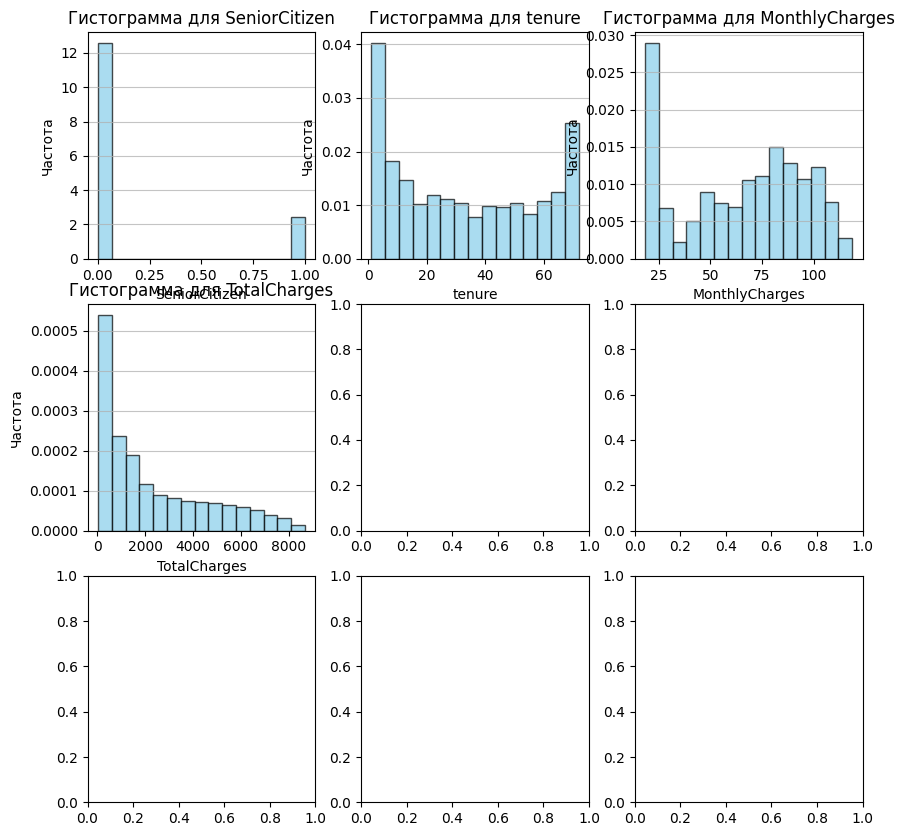

In [650]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, column in enumerate(numeric_columns):
    ax = axs[i // 3, i % 3]
    ax.hist(data[column], bins=15, alpha=0.7, color='skyblue', edgecolor='black', density=True)

    ax.set_title(f'Гистограмма для {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(axis='y', alpha=0.75)
plt.show()

## Визуализация коррелляции

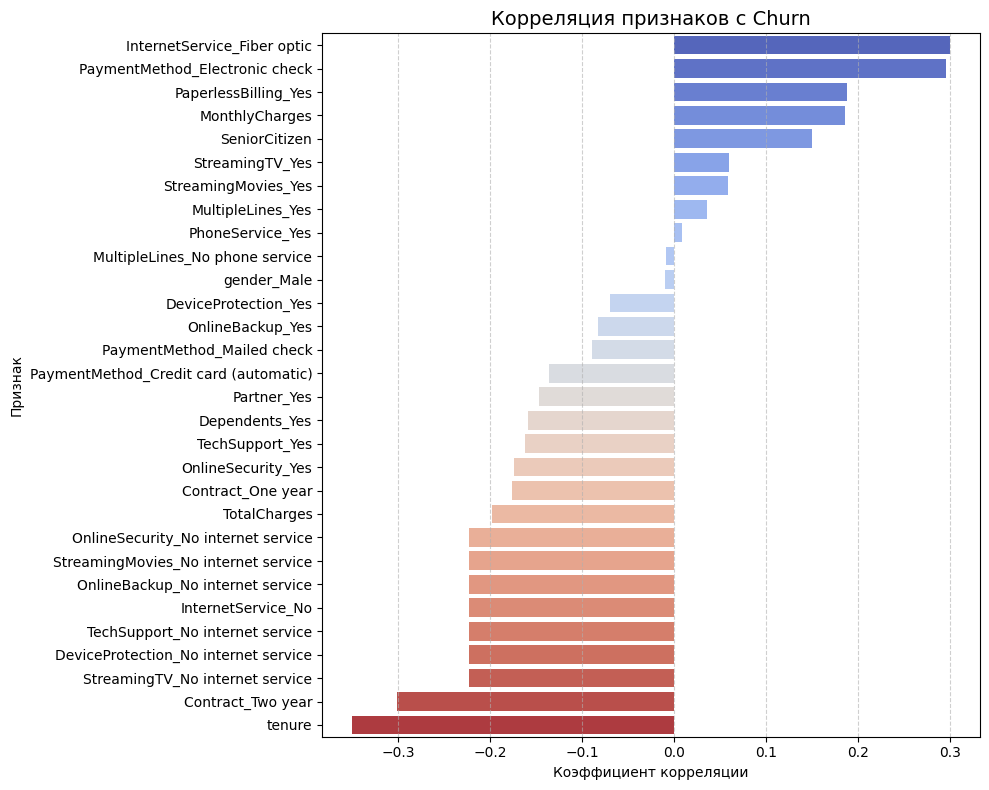

In [651]:
features = data.drop(columns=["customerID", "Churn"])
df_encoded = pd.get_dummies(features, drop_first=True)

df_encoded["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

corr_matrix = df_encoded.corr()

churn_corr = corr_matrix["Churn"].sort_values(ascending=False)

top_positive_corr = churn_corr[1:16]  # [0] — это сама Churn
top_negative_corr = churn_corr[-15:]

corr_df = pd.concat([top_positive_corr, top_negative_corr])
corr_df = corr_df.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr_df.values, y=corr_df.index, palette="coolwarm")
plt.title("Корреляция признаков с Churn", fontsize=14)
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   int64  
 3   Partner           5976 non-null   object 
 4   Dependents        5976 non-null   object 
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   object 
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   object 
 17  

## Гипотезы

Построим несколько гипотез, опираясь на матрицу (на самом деле barplot) корелляции

1. Гипотеза: Клиенты с оптоволоконным интернетом (Fiber optic) чаще уходят, несмотря на высокую скорость, из-за высокой стоимости или нестабильности сервиса.  
    Как проверить:  
    - Сравнить средние MonthlyCharges для Fiber optic vs. другие значения  
    - Построить график: sns.barplot(x='InternetService', y='Churn', data=df).  

2. Гипотеза: Клиенты, использующие электронные чеки (Electronic check), чаще уходят, потому что этот метод менее удобен или не поддерживает автоматические платежи.  
    Как проверить:
    - Сравнить % оттока между Electronic check, Credit card и Bank transfer.

3. Гипотеза: Клиенты с безбумажными счетами чаще уходят, так как они более технологичны и чувствительны к альтернативам.  
    Как проверить:
    - Сравнить отток в группах PaperlessBilling_Yes и No.
    - Проверить, связано ли это с возрастом (SeniorCitizen), у нас есть параметр является ли клиент пенсионером.

4. Гипотеза: Клиенты с высокими MonthlyCharges чаще уходят из-за несоответствия цены и качества.  
    Как проверить:
    - Разделить клиентов на 3 группы по расходам (низкие/средние/высокие) и сравнить отток.
    - Построить sns.histplot(x='MonthlyCharges', hue='Churn', data=df).

5. Гипотеза: Клиенты, которые недавно подключились (tenure < 12 месяцев), чаще уходят, так как еще не успели привыкнуть к сервису или столкнулись с "разочарованием после покупки".  
    Как проверить:
    - Разделить клиентов на группы по tenure (например, 0–6, 6–12, 12+ месяцев).
    - Построить график

6. Гипотеза: Клиенты с многоканальной связью (MultipleLines) чаще уходят, потому что это дорогая услуга с низкой добавленной ценой.  
    Как проверить:
    - Сравнить средние MonthlyCharges для клиентов с MultipleLines_Yes и No.
    - Построить график: sns.countplot(x='MultipleLines', hue='Churn', data=df).

7. Гипотеза: Клиенты с семьей (Partner = Yes или Dependents = Yes) реже уходят, так как им сложнее менять провайдера для всех членов семьи.  
    Как проверить:
    - Объединить признаки и проверить корелляцию

In [653]:
cols_to_check = ['InternetService', 'PaymentMethod', 'PaperlessBilling', 
                'SeniorCitizen', 'MultipleLines', 'Partner', 
                'Dependents', 'Churn']

for col in cols_to_check: # это чтобы понимать что строить
    print(f'{col}: {data[col].unique()}')

InternetService: ['No' 'Fiber optic' 'DSL']
PaymentMethod: ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']
PaperlessBilling: ['No' 'Yes']
SeniorCitizen: [0 1]
MultipleLines: ['Yes' 'No' 'No phone service']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
Churn: ['No' 'Yes']


## Проверка гипотез

### 1. Клиенты с оптоволоконным интернетом (Fiber optic) чаще уходят, несмотря на высокую скорость, из-за высокой стоимости или нестабильности сервиса.

In [654]:
import warnings
warnings.filterwarnings('ignore')  


Процент оттока:
InternetService
DSL            19.234496
Fiber optic    41.530263
No              7.704280
Name: Churn_num, dtype: float64

Количество клиентов:
Churn_num           0     1
InternetService            
DSL              1667   397
Fiber optic      1536  1091
No               1186    99


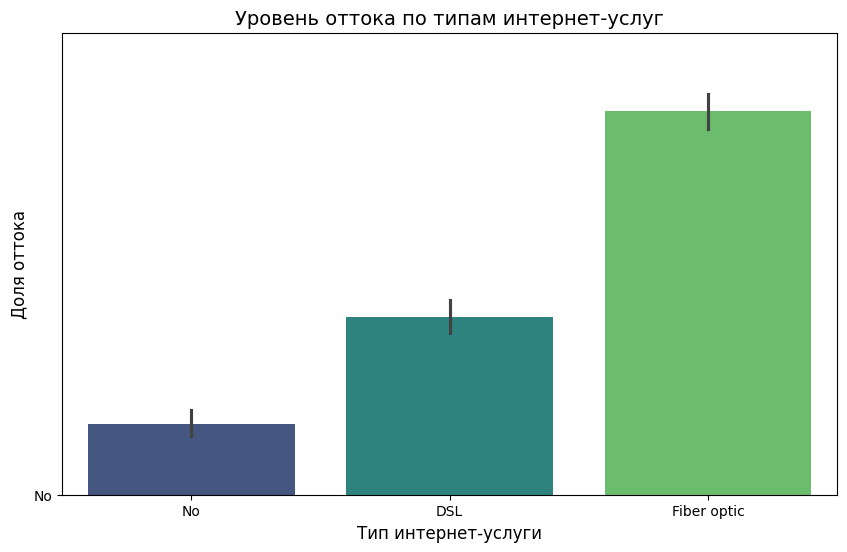

In [655]:
data['Churn_num'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nПроцент оттока:")
print(data.groupby('InternetService')['Churn_num'].mean() * 100)

print("\nКоличество клиентов:")
print(data.groupby(['InternetService', 'Churn_num']).size().unstack())

plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='Churn', 
            data=data, 
            order=['No', 'DSL', 'Fiber optic'],
            palette='viridis')
plt.title('Уровень оттока по типам интернет-услуг', fontsize=14)
plt.xlabel('Тип интернет-услуги', fontsize=12)
plt.ylabel('Доля оттока', fontsize=12)
plt.ylim(0, 0.5)
plt.show()

### 2. Гипотеза: Клиенты, использующие электронные чеки (Electronic check), чаще уходят, потому что этот метод менее удобен или не поддерживает автоматические платежи.  


Процент оттока по способам оплаты:
PaymentMethod
Electronic check             44.965105
Mailed check                 19.309838
Bank transfer (automatic)    17.151608
Credit card (automatic)      15.207373
Name: Churn_num, dtype: float64

Количество клиентов:
Churn_num                     0    1
PaymentMethod                       
Bank transfer (automatic)  1082  224
Credit card (automatic)    1104  198
Electronic check           1104  902
Mailed check               1099  263


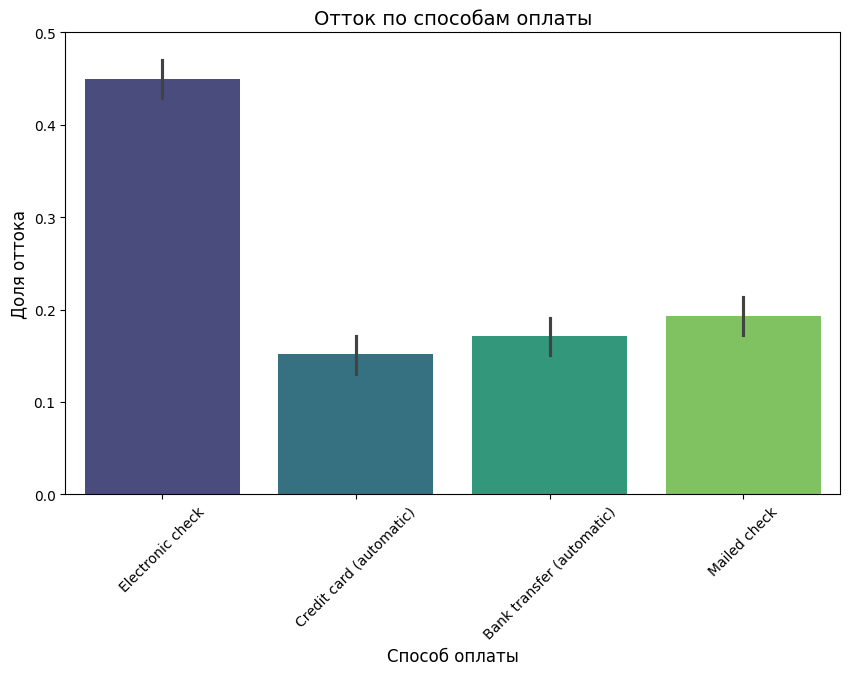

In [656]:
print("\nПроцент оттока по способам оплаты:")
print(data.groupby('PaymentMethod')['Churn_num'].mean().sort_values(ascending=False) * 100)

print("\nКоличество клиентов:")
print(data.groupby(['PaymentMethod', 'Churn_num']).size().unstack())

plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='Churn_num', 
            data=data,
            order=['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check'],
            palette='viridis')
plt.title('Отток по способам оплаты', fontsize=14)
plt.xlabel('Способ оплаты', fontsize=12)
plt.ylabel('Доля оттока', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.show()

### 3. Гипотеза: Клиенты с безбумажными счетами чаще уходят, так как они более технологичны и чувствительны к альтернативам.  

Процент оттока:
PaperlessBilling
No     16.564667
Yes    33.503546
Name: Churn_num, dtype: float64

Влияние возраста:
SeniorCitizen             0          1
PaperlessBilling                      
No                15.339631  28.508772
Yes               30.283459  45.663957


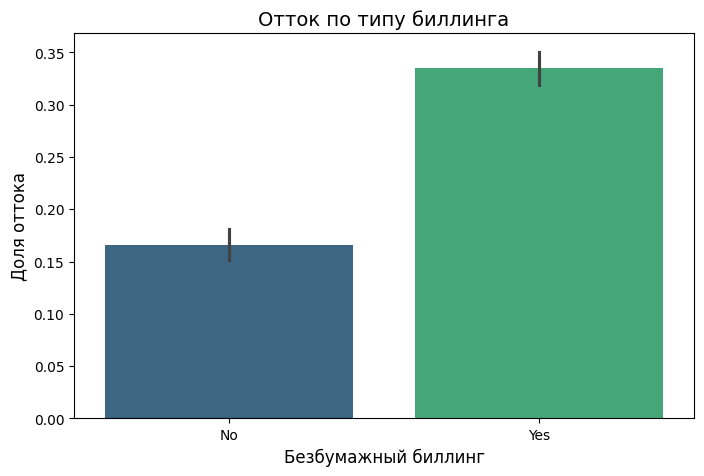

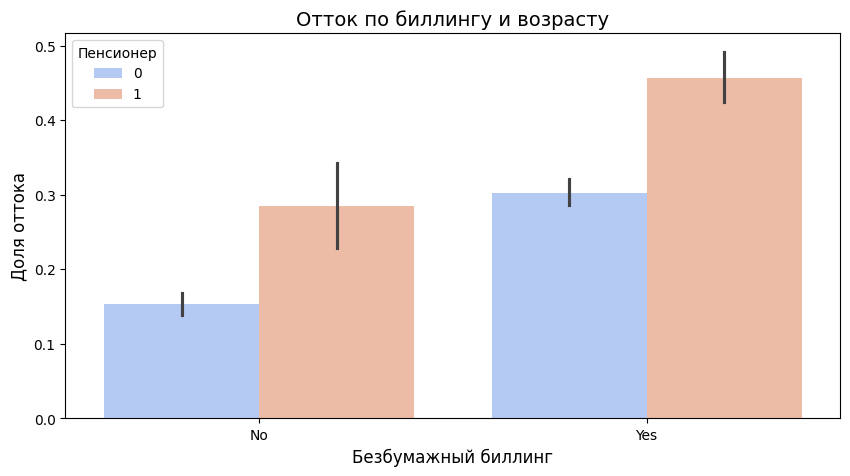

In [657]:
print("Процент оттока:")
print(data.groupby('PaperlessBilling')['Churn_num'].mean() * 100)

print("\nВлияние возраста:")
print(data.groupby(['PaperlessBilling', 'SeniorCitizen'])['Churn_num'].mean().unstack() * 100)

plt.figure(figsize=(8, 5))
sns.barplot(x='PaperlessBilling', y='Churn_num', 
            data=data,
            order=['No', 'Yes'],
            palette='viridis')
plt.title('Отток по типу биллинга', fontsize=14)
plt.xlabel('Безбумажный биллинг', fontsize=12)
plt.ylabel('Доля оттока', fontsize=12)
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x='PaperlessBilling', y='Churn_num', 
            hue='SeniorCitizen',
            data=data,
            palette='coolwarm')
plt.title('Отток по биллингу и возрасту', fontsize=14)
plt.xlabel('Безбумажный биллинг', fontsize=12)
plt.ylabel('Доля оттока', fontsize=12)
plt.legend(title='Пенсионер')
plt.show()

### 4. Гипотеза: Клиенты с высокими MonthlyCharges чаще уходят из-за несоответствия цены и качества.  

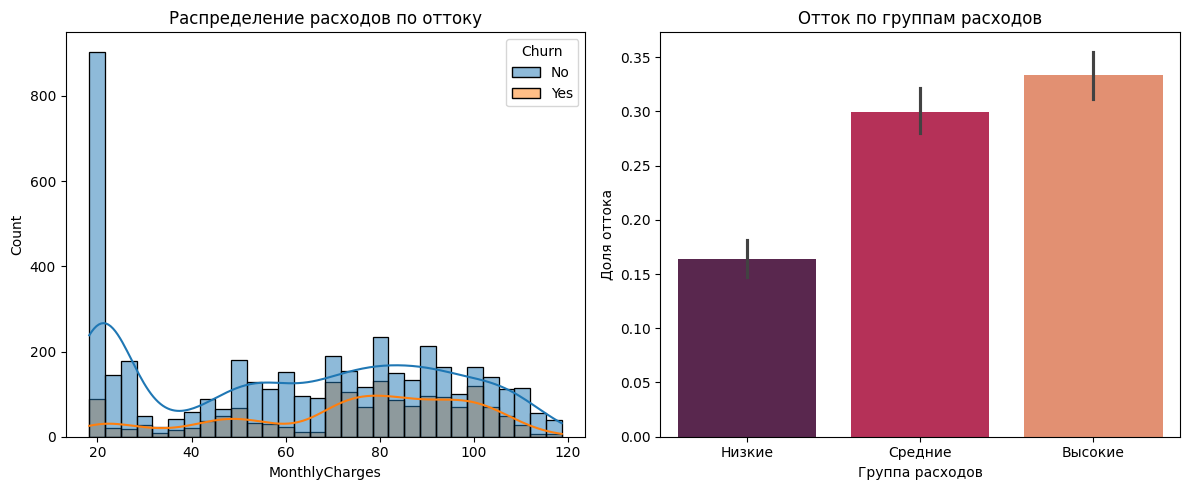

Процент оттока по группам:
Spend_Group
Высокие    33.350101
Средние    29.974937
Низкие     16.357250
Name: Churn_num, dtype: float64

Границы групп расходов:
MonthlyCharges
(50.35, 84.05]     1995
(18.249, 50.35]    1993
(84.05, 118.75]    1988
Name: count, dtype: int64


In [658]:
data['Spend_Group'] = pd.qcut(data['MonthlyCharges'], q=3, labels=['Низкие', 'Средние', 'Высокие'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='MonthlyCharges', hue='Churn', data=data, bins=30, kde=True)
plt.title('Распределение расходов по оттоку')

plt.subplot(1, 2, 2)
sns.barplot(x='Spend_Group', y='Churn_num', data=data, order=['Низкие', 'Средние', 'Высокие'], palette='rocket')
plt.title('Отток по группам расходов')
plt.xlabel('Группа расходов')
plt.ylabel('Доля оттока')
plt.tight_layout()
plt.show()

print("Процент оттока по группам:")
print(data.groupby('Spend_Group')['Churn_num'].mean().sort_values(ascending=False) * 100)

print("\nГраницы групп расходов:")
print(pd.qcut(data['MonthlyCharges'], q=3).value_counts())

### 5. Гипотеза: Клиенты, которые недавно подключились (tenure < 12 месяцев), чаще уходят, так как еще не успели привыкнуть к сервису или столкнулись с "разочарованием после покупки".  

Процент оттока по группам:
Tenure_Group
12+ мес     17.497048
6-12 мес    35.986733
0-6 мес     55.272408
Name: Churn_num, dtype: float64

Количество клиентов в каждой группе:
Tenure_Group
0-6 мес     1138
6-12 мес     603
12+ мес     4235
Name: count, dtype: int64


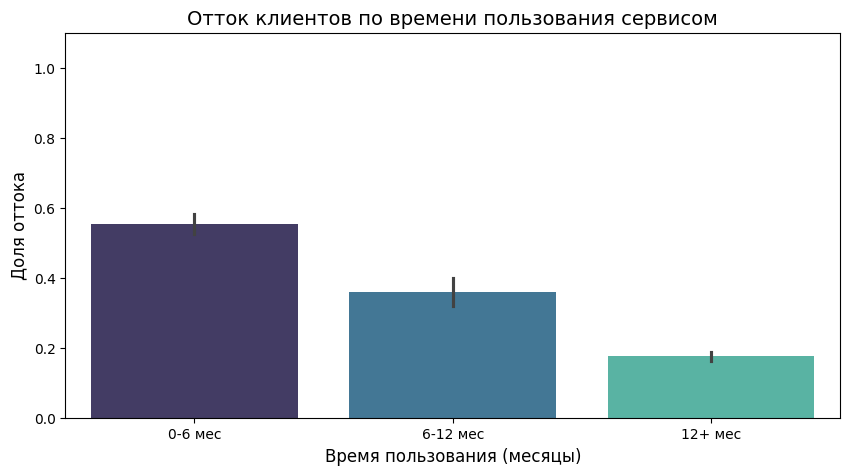

In [659]:
data['Tenure_Group'] = pd.cut(data['tenure'],
                             bins=[0, 6, 12, float('inf')],
                             labels=['0-6 мес', '6-12 мес', '12+ мес'],
                             right=False)
print("Процент оттока по группам:")
print(data.groupby('Tenure_Group')['Churn_num'].mean().sort_values() * 100)

print("\nКоличество клиентов в каждой группе:")
print(data['Tenure_Group'].value_counts().sort_index())


plt.figure(figsize=(10, 5))
sns.barplot(x='Tenure_Group', y='Churn_num', 
            data=data,
            order=['0-6 мес', '6-12 мес', '12+ мес'],
            palette='mako')
plt.title('Отток клиентов по времени пользования сервисом', fontsize=14)
plt.xlabel('Время пользования (месяцы)', fontsize=12)
plt.ylabel('Доля оттока', fontsize=12)
plt.ylim(0, data['Churn_num'].max()*1.1)
plt.show()

### 6. Гипотеза: Клиенты с многоканальной связью (MultipleLines) чаще уходят, потому что это дорогая услуга с низкой добавленной ценой.

Средние расходы:
MultipleLines
No                  54.101090
No phone service    41.900170
Yes                 82.152102
Name: MonthlyCharges, dtype: float64

Процент оттока:
MultipleLines
Yes                 28.408644
No phone service    25.340136
No                  25.149490
Name: Churn_num, dtype: float64


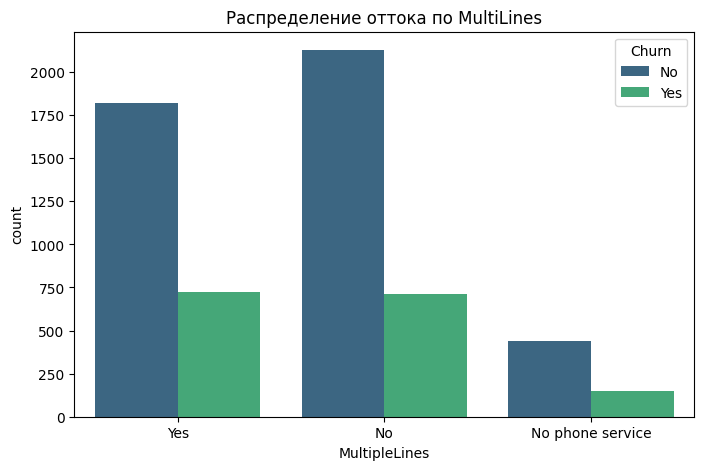

In [660]:
print("Средние расходы:")
print(data.groupby('MultipleLines')['MonthlyCharges'].mean())

print("\nПроцент оттока:")
print(data.groupby('MultipleLines')['Churn_num'].mean().sort_values(ascending=False)*100)

plt.figure(figsize=(8,5))
sns.countplot(x='MultipleLines', hue='Churn', data=data, palette='viridis')
plt.title('Распределение оттока по MultiLines')
plt.show()

### 7. Гипотеза: Клиенты с семьей (Partner = Yes или Dependents = Yes) реже уходят, так как им сложнее менять провайдера для всех членов семьи.  

Процент оттока:
Has_Family
False    34.054054
True     20.056232
Name: Churn_num, dtype: float64

Корреляция: -0.158 (чем ближе к -1, тем сильнее обратная связь)

Отток по Partner:
Partner
No     32.824675
Yes    19.889503
Name: Churn_num, dtype: float64

Отток по Dependents:
Dependents
No     31.132300
Yes    15.777653
Name: Churn_num, dtype: float64


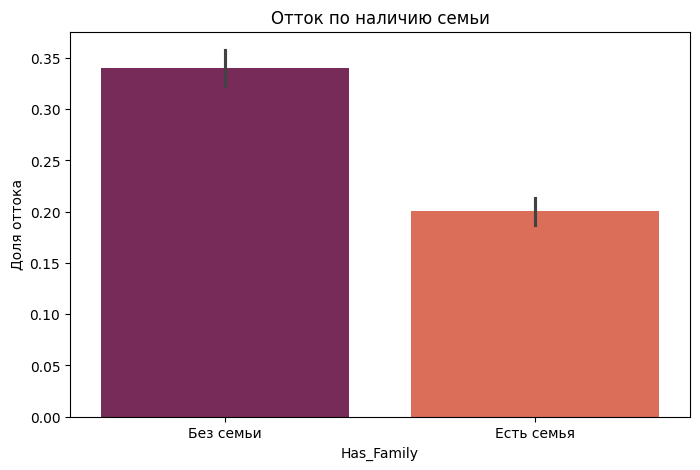

In [661]:
data['Has_Family'] = (data['Partner'] == 'Yes') | (data['Dependents'] == 'Yes')

print("Процент оттока:")
print(data.groupby('Has_Family')['Churn_num'].mean() * 100)

corr = data[['Has_Family', 'Churn_num']].corr().iloc[0,1]
print(f"\nКорреляция: {corr:.3f} (чем ближе к -1, тем сильнее обратная связь)")

print("\nОтток по Partner:")
print(data.groupby('Partner')['Churn_num'].mean() * 100)

print("\nОтток по Dependents:")
print(data.groupby('Dependents')['Churn_num'].mean() * 100)

plt.figure(figsize=(8,5))
sns.barplot(x='Has_Family', y='Churn_num', data=data, palette='rocket')
plt.title('Отток по наличию семьи')
plt.xticks([0,1], ['Без семьи', 'Есть семья'])
plt.ylabel('Доля оттока')
plt.show()


# Задание 2

Задание 2. 

Построение моделей для прогнозирования оттока:
1. Моделирование.
Т.к. мы решаем задачу классификации, в которой у нас есть "правильные ответы", то оптимально будет выбрать следующие модели:
 * RandomForestClassifier - это не очень быстрый алгоритм, но зато он дает достаточно точные результаты. Скорость для нас не проблема, т.к. данных не очень много
 * SVC - также, как RandomForestClassifier показывает высокие результаты точности, но не очень быстрый
 * GradientBoostingClassifier - аналогично предыдущим 2-м алгоримам
 * LogisticRegression - менее точный алгоритм, но при этом достаточно быстрый и хорошо интерпритируемыми результатами
2. Обучение модели
3. ⁠Оценка качества модели 
4. ⁠Попробуем улучшить качество моделей за счет подбора параметров методом GridSearch
5. ⁠Заключение
В результате сравнения моделей мы видим, что самой точной оказалась модель ____, а самый низкий показатель точности оказался у модели ____соответственно на данном наборе данных можно успешно использовать более быстрый алгоритм __________ что хорошо, если модель будет использоваться на большем объеме данных.

Также в результате проведенного анализа было установлено, что наиболее важные показатели при прогнозировании оттока — это _________________. Остальные параметры либо не оказывают прямого влияния на результат (например, __________), либо сильно связаны друг с другом, поэтому достаточно одного какого-то параметра для оценки (____________).

## Подготовка к моделированию

### Кодирование категориальных, выделений X и Y, train_test_split

In [664]:
data = data.drop(['customerID', 'Churn'], axis=1)

In [665]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Has_Family,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Spend_Group_Средние,Spend_Group_Высокие,Tenure_Group_6-12 мес,Tenure_Group_12+ мес
0,0,72,24.10,1734.65,0,True,True,True,True,True,...,False,True,False,True,False,False,False,False,False,True
1,0,44,88.15,3973.20,0,False,False,False,False,True,...,False,False,True,True,False,False,False,True,False,True
2,1,38,74.95,2869.85,1,True,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
3,0,4,55.90,238.50,0,False,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,53.45,119.50,0,False,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False


In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 5985
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5976 non-null   int64  
 1   tenure                                 5976 non-null   int64  
 2   MonthlyCharges                         5976 non-null   float64
 3   TotalCharges                           5976 non-null   float64
 4   Churn_num                              5976 non-null   int64  
 5   Has_Family                             5976 non-null   bool   
 6   gender_Male                            5976 non-null   bool   
 7   Partner_Yes                            5976 non-null   bool   
 8   Dependents_Yes                         5976 non-null   bool   
 9   PhoneService_Yes                       5976 non-null   bool   
 10  MultipleLines_No phone service         5976 non-null   bool   
 11  MultipleL

In [667]:
data['Churn_num'].unique()

array([0, 1])

In [668]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn_num', axis=1)
y = data['Churn_num']
x_learn, x_test, y_learn, y_test = train_test_split(X, y, test_size=0.2)

print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

learn: (4780, 35) - (4780,); test: (1196, 35) - (1196,)


### Balance

In [669]:
from collections import Counter

print("Баланс классов:", Counter(y_learn))

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_learn, y_learn = smote.fit_resample(x_learn, y_learn)
print("После балансировки learn:", Counter(y_learn))

print(f'learn: {x_learn.shape} - {y_learn.shape}; test: {x_test.shape} - {y_test.shape}')

Баланс классов: Counter({0: 3511, 1: 1269})
После балансировки learn: Counter({0: 3511, 1: 3511})
learn: (7022, 35) - (7022,); test: (1196, 35) - (1196,)


### Scaling

In [670]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
x_learn_scaled = scaler.fit_transform(x_learn)
x_test_scaled = scaler.transform(x_test)

## Функции

In [671]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_recall_fscore_support, confusion_matrix


def metrics_graph(yl, yt, ypl, ypt, prnt = True, graph = True):
  accuracy_learn = accuracy_score(yl, ypl)
  pre_rec_f_learn = precision_recall_fscore_support(yl, ypl, average='weighted')
  precision_learn, recall_learn, f1_learn, support_learn = pre_rec_f_learn
  cohen_kappa_learn = cohen_kappa_score(yl, ypl)

  accuracy_test = accuracy_score(yt, ypt)
  pre_rec_f_test = precision_recall_fscore_support(yt, ypt, average='weighted')
  precision_test, recall_test, f1_test, support_test = pre_rec_f_test
  cohen_kappa_test = cohen_kappa_score(yt, ypt)

  if prnt:
    print(f'Learn: kappa={cohen_kappa_learn:.4f}, acc={accuracy_learn:.4f}, pre={precision_learn:.4f}, rec={recall_learn:.4f}, f1={f1_learn:.4f}, support={support_learn}')
    print(f'Test:  kappa={cohen_kappa_test:.4f}, acc={accuracy_test:.4f}, pre={precision_test:.4f}, rec={recall_test:.4f}, f1={f1_test:.4f}, support={support_test}')


  if graph:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_learn = confusion_matrix(yl, y_pred_learn)
    sns.heatmap(cm_learn, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[0])
    axes[0].set_xlabel('Прогноз')
    axes[0].set_ylabel('Реальные значения')
    axes[0].set_title('Матрица ошибок LEARN')

    cm_test = confusion_matrix(yt, ypt)
    sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], ax = axes[1])
    axes[1].set_xlabel('Прогноз')
    axes[1].set_ylabel('Реальные значения')
    axes[1].set_title('Матрица ошибок TEST')

    plt.show()

## Модели

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


### Logistic

Learn: kappa=0.6784, acc=0.8392, pre=0.8392, rec=0.8392, f1=0.8392, support=None
Test:  kappa=0.4552, acc=0.7826, pre=0.7877, rec=0.7826, f1=0.7849, support=None


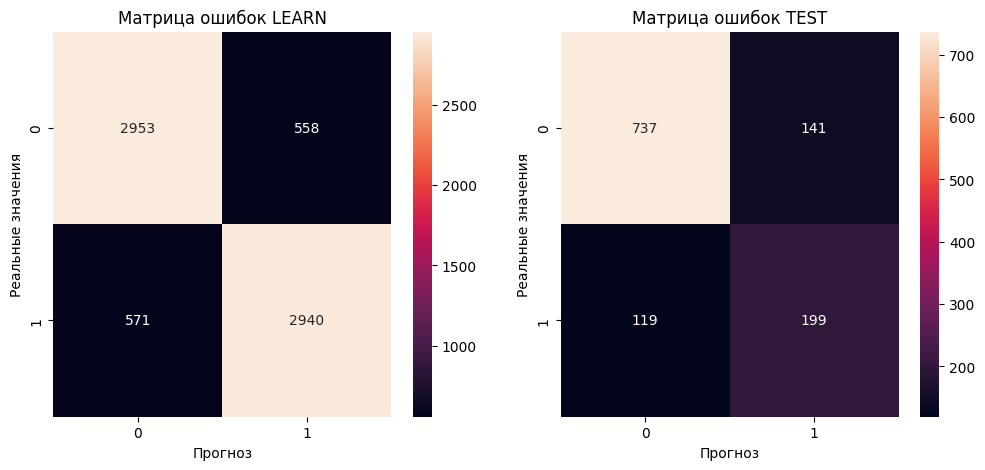

In [677]:
model = LogisticRegression()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### RandomForest

Learn: kappa=0.9980, acc=0.9990, pre=0.9990, rec=0.9990, f1=0.9990, support=None
Test:  kappa=0.4531, acc=0.7901, pre=0.7867, rec=0.7901, f1=0.7883, support=None


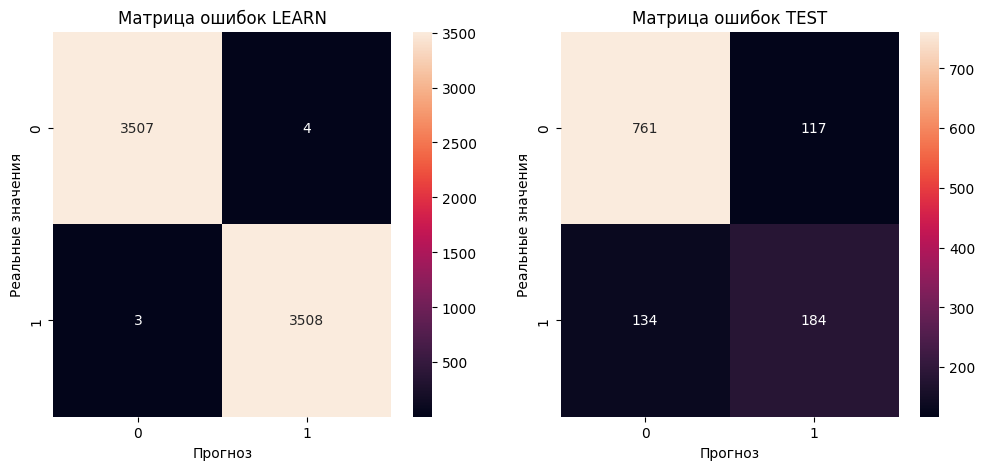

In [678]:
model = RandomForestClassifier()

model.fit(x_learn_scaled, y_learn)

y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)

metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

### SVC

Learn: kappa=0.7132, acc=0.8566, pre=0.8568, rec=0.8566, f1=0.8566, support=None
Test:  kappa=0.4683, acc=0.7885, pre=0.7927, rec=0.7885, f1=0.7904, support=None


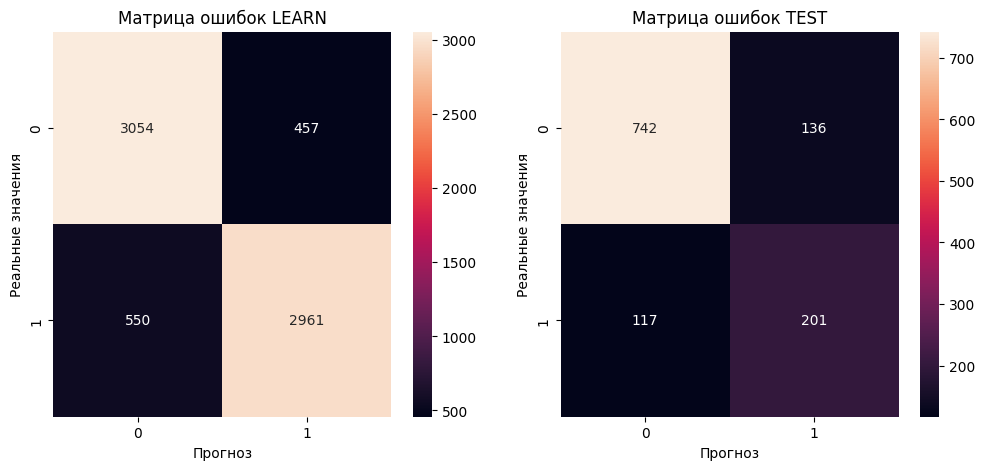

In [680]:
model = SVC()
model.fit(x_learn_scaled, y_learn)
y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)
metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)


### GradientBoosting + GridSearch

Learn: kappa=0.7075, acc=0.8537, pre=0.8541, rec=0.8537, f1=0.8537, support=None
Test:  kappa=0.4995, acc=0.7960, pre=0.8062, rec=0.7960, f1=0.8000, support=None


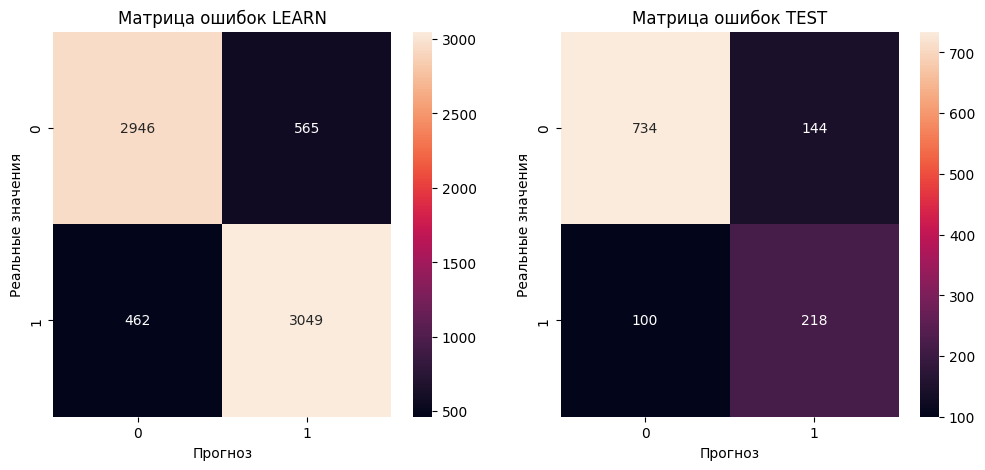

In [681]:
model = GradientBoostingClassifier()
model.fit(x_learn_scaled, y_learn)
y_pred_learn = model.predict(x_learn_scaled)
y_pred_test = model.predict(x_test_scaled)
metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

Начинаем подбор параметров для GradientBoosting...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Learn: kappa=0.8704, acc=0.9352, pre=0.9352, rec=0.9352, f1=0.9352, support=None
Test:  kappa=0.4915, acc=0.8027, pre=0.8015, rec=0.8027, f1=0.8021, support=None


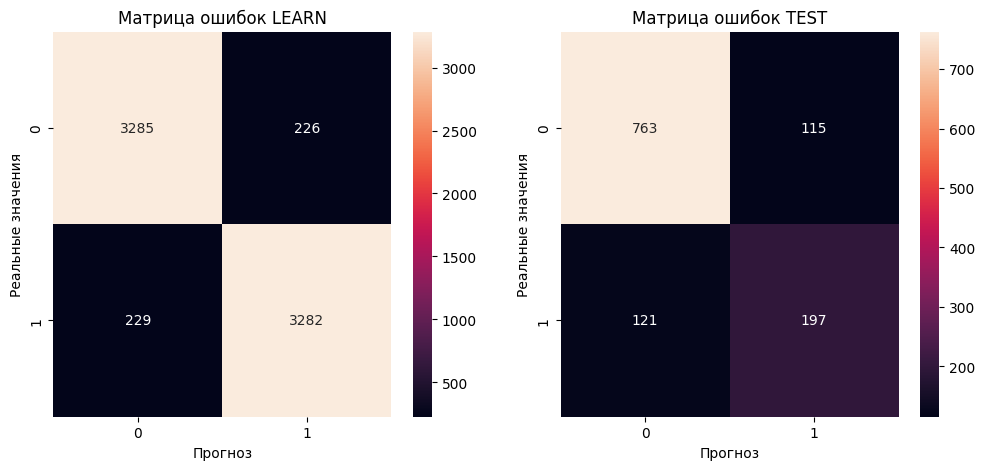

In [682]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, 
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=1)


print("Начинаем подбор параметров для GradientBoosting...")
grid_search.fit(x_learn_scaled, y_learn)

print("Лучшие параметры:", grid_search.best_params_)

best_gb = grid_search.best_estimator_
y_pred_learn = best_gb.predict(x_learn_scaled)
y_pred_test = best_gb.predict(x_test_scaled)
metrics_graph(y_learn, y_test, y_pred_learn, y_pred_test)

## Заключение:

В результате сравнения моделей мы видим, что самой точной оказалась модель GradientBossting, оптимизированная GridSearch'ем, в целом я использовал несколько метрик и нужно подходить к анализу довольно комплексно.

Также в результате проведенного анализа было установлено, что наиболее важные показатели при прогнозировании оттока — это PaymentMethod, tenure и totalcharges. Остальные параметры либо не оказывают прямого влияния на результат (например, почти все, за исключением этих трех :) ), либо сильно связаны друг с другом (был такой один, пришлось дропнуть), поэтому достаточно этих трех параметров для оценки, если оптимизировать модель.

Тажке я просто ради интереса сделал ИИшкой код рекомендаций для случайных клиентов. Не стал самостоятельно прорабатывать, просто подсмотрел возможность и захотел сделать похожее.

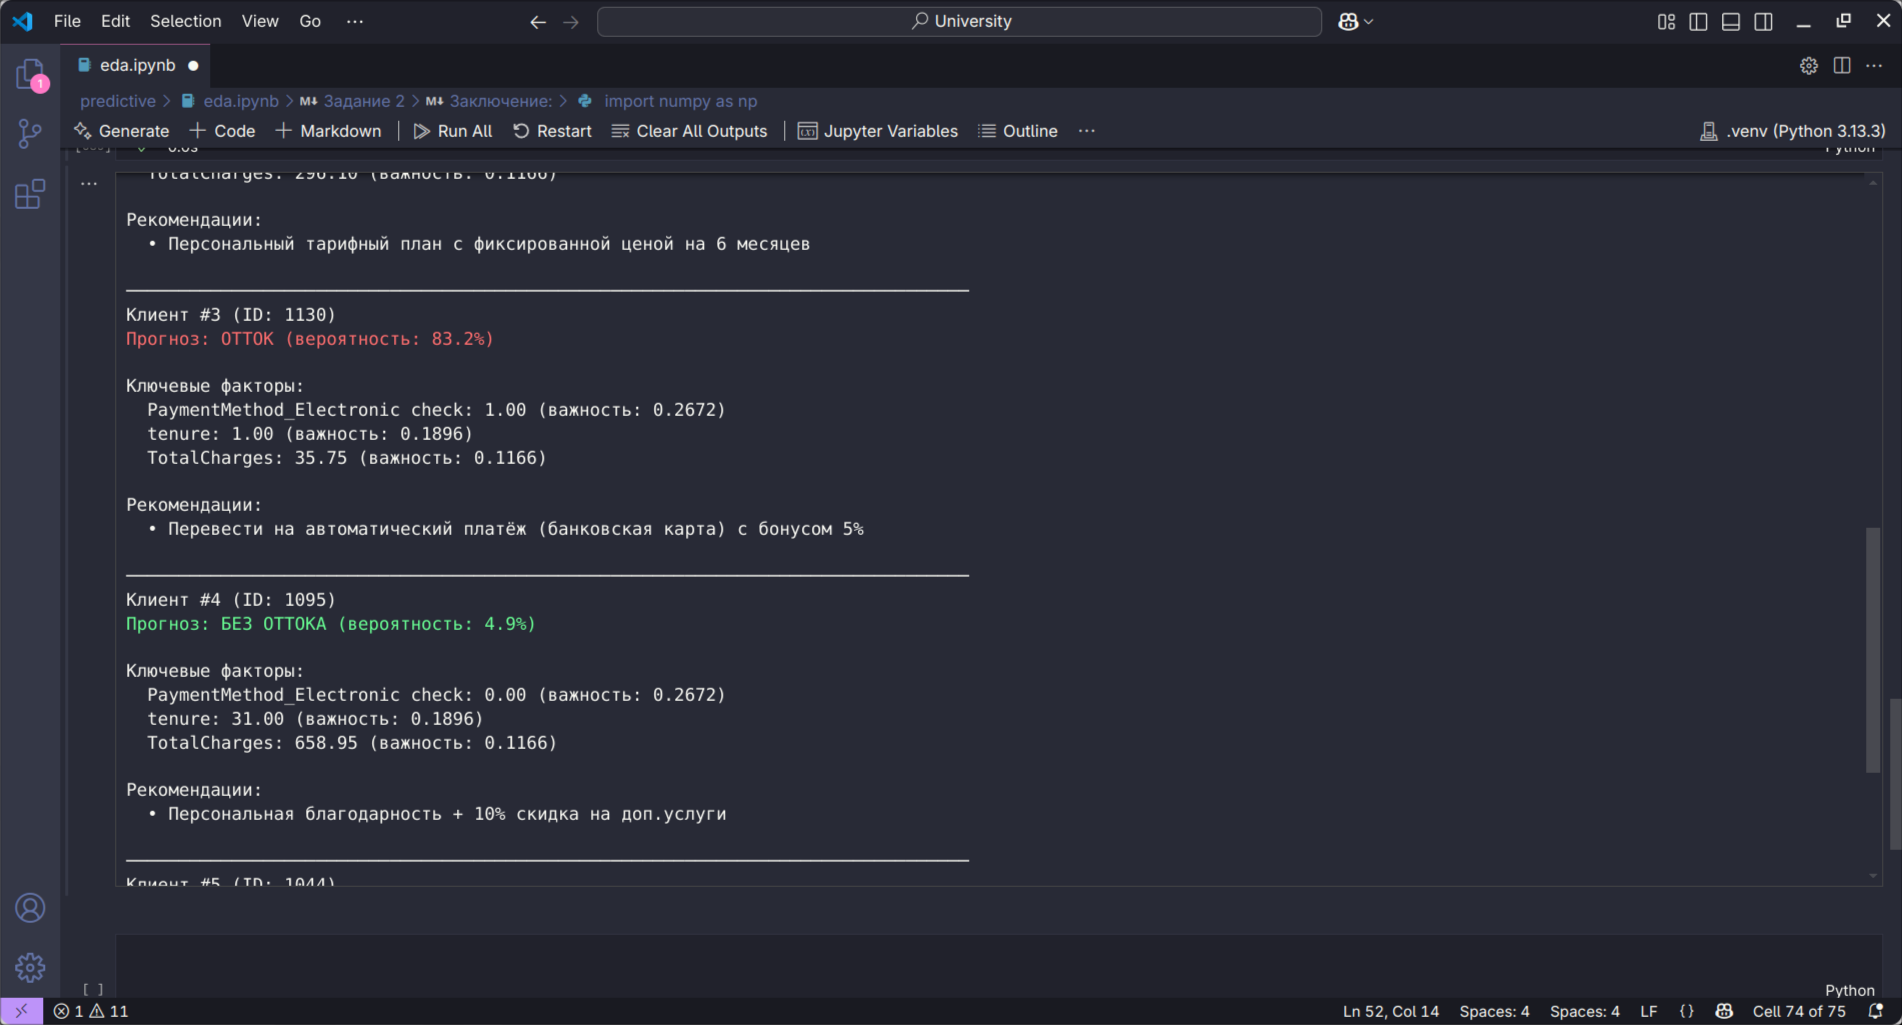

In [ ]:
import numpy as np
import pandas as pd

assert hasattr(best_gb, 'classes_'), "Модель не имеет атрибута classes_"
print(f"Классы модели: 0={best_gb.classes_[0]} (без оттока), 1={best_gb.classes_[1]} (отток)")

# Получаем важность признаков
feature_importances = best_gb.feature_importances_
feature_names = x_learn.columns if hasattr(x_learn, 'columns') else [f'Feature_{i}' for i in range(x_learn.shape[1])]
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Выбираем 5 случайных клиентов
np.random.seed(42)
sample_indices = np.random.choice(len(x_test), 5)
sample_clients = x_test.iloc[sample_indices] if hasattr(x_test, 'iloc') else pd.DataFrame(x_test, columns=feature_names).iloc[sample_indices]

# Предсказания и вероятности
preds = best_gb.predict(x_test_scaled[sample_indices])
probas = best_gb.predict_proba(x_test_scaled[sample_indices])[:, 1]  # берём вероятность класса 1 (отток)

print("\n" + "═" * 80)
print(f"{'АНАЛИЗ ОТТОКА КЛИЕНТОВ':^80}")
print("═" * 80)
print(f"{'❗ 1 = Отток' :<40}{'✅ 0 = Без оттока' :>40}")
print("\nТОП-5 факторов оттока:")
print(features_df.head(5).to_markdown(tablefmt="grid", floatfmt=".4f"))

for i, (idx, pred, proba) in enumerate(zip(sample_indices, preds, probas)):
    client_data = sample_clients.iloc[i] if hasattr(sample_clients, 'iloc') else sample_clients[i]
    
    risk_color = "\033[91m" if pred == 1 else "\033[92m"
    reset_color = "\033[0m"
    
    print("\n" + "─" * 80)
    print(f"Клиент #{i+1} (ID: {idx})")
    print(f"{risk_color}Прогноз: {'ОТТОК' if pred == 1 else 'БЕЗ ОТТОКА'} (вероятность: {proba:.1%}){reset_color}")
    
    # Топ-3 влиятельных параметра
    print("\nКлючевые факторы:")
    for feat in features_df.head(3)['Feature']:
        val = client_data[feat]
        imp = features_df.loc[features_df['Feature'] == feat, 'Importance'].values[0]
        print(f"  {feat}: {val:.2f} (важность: {imp:.4f})")

    # Рекомендации на основе ключевых факторов
    print("\nРекомендации:")
    
    if pred == 1:  
        if client_data['PaymentMethod_Electronic check'] == 1:
            print("  • Перевести на автоматический платёж (банковская карта) с бонусом 5%")
        elif client_data['tenure'] < 3:
            print("  • Предложить скидку 15% за подписку на 12 месяцев")
        elif client_data['TotalCharges'] < 500:
            print("  • Персональный тарифный план с фиксированной ценой на 6 месяцев")
        else:
            print("  • Эксклюзивное предложение: бесплатный месяц обслуживания")
            
    else:
        if client_data['TotalCharges'] > 2000:
            print("  • Программа лояльности: кэшбэк 3% от платежей")
        else:
            print("  • Персональная благодарность + 10% скидка на доп.услуги")

print("\n" + "═" * 80)

Классы модели: 0=0 (без оттока), 1=1 (отток)

════════════════════════════════════════════════════════════════════════════════
                             АНАЛИЗ ОТТОКА КЛИЕНТОВ                             
════════════════════════════════════════════════════════════════════════════════
❗ 1 = Отток                                                     ✅ 0 = Без оттока

ТОП-5 факторов оттока:
+----+--------------------------------+--------------+
|    | Feature                        |   Importance |
+====+================================+==============+
| 29 | PaymentMethod_Electronic check |       0.2672 |
+----+--------------------------------+--------------+
|  1 | tenure                         |       0.1896 |
+----+--------------------------------+--------------+
|  3 | TotalCharges                   |       0.1166 |
+----+--------------------------------+--------------+
|  2 | MonthlyCharges                 |       0.1005 |
+----+--------------------------------+--------------+
|